In [1]:
from google.colab import files
uploaded = files.upload()

Saving final_data_product.csv to final_data_product.csv


In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
df = pd.read_csv("final_data_product.csv")
df

,lap_id,invalid_lap,BPS_SPEED,BPS_THROTTLE,BPS_STEER,BPS_BRAKE,BPS_CURRENTLAPTIMEINMS,BPS_LAPDISTANCE,BPS_WORLDPOSITIONX,BPS_WORLDPOSITIONY,...,dist_530_YAW,dist_530_PITCH,dist_530_ROLL,dist_530_left_dist,dist_530_right_dist,dist_530_dist_apex_1,dist_530_dist_apex_2,dist_530_angle_to_apex1,dist_530_angle_to_apex2,dist_530_proj_from_ref
0,10021698834789871149_1,1,316.0,1.000000,0.074568,0.0,2615.0,223.0,274.071987,313.458779,...,-2.715189,0.000475,-0.016953,1.741342,10.851370,132.666175,33.599712,-177.333510,-157.363838,3.100772
1,10021698834789871149_10,1,324.0,0.970802,0.000464,0.0,3097.0,273.0,310.096901,278.846172,...,-2.677639,-0.002429,-0.010994,5.229576,7.362893,134.315712,34.235318,-178.276773,-162.785343,0.365266
2,10021698834789871149_11,1,322.0,1.000000,-0.002375,0.0,2976.0,258.0,298.743940,288.688005,...,-2.672484,-0.003209,-0.015086,4.491344,8.101110,133.962370,34.073817,-177.906287,-161.483133,0.368740
3,10021698834789871149_12,0,322.0,0.025177,0.006011,0.0,3049.0,269.0,307.165908,281.569461,...,-2.683784,-0.003549,-0.013458,4.000375,8.592165,133.726732,33.972230,-177.665140,-160.617290,0.856654
4,10021698834789871149_13,1,324.0,1.000000,0.021114,0.0,3046.0,268.0,306.397540,282.215448,...,-2.576070,0.002121,-0.016932,5.969796,6.622633,134.674490,34.413890,-179.086529,-164.518584,1.101108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,9874269645241895165_2,1,144.0,0.000000,-0.525250,0.0,6234.0,450.0,369.369267,134.915112,...,-2.670881,0.003020,-0.000062,0.781471,11.886334,128.781581,29.677781,-178.004607,-156.571125,3.664728
1028,9941972541231747669_1,1,324.0,1.000000,0.000000,0.0,2979.0,263.0,302.615240,285.497492,...,-2.689289,-0.003212,-0.016119,2.482649,10.109993,133.011217,33.706067,-177.128822,-158.125436,2.364715
1029,9941972541231747669_2,0,324.0,1.000000,-0.000000,0.0,3014.0,264.0,303.184481,284.646456,...,-2.691542,-0.003572,-0.011709,3.187732,9.404851,133.342247,33.821835,-177.350536,-159.259773,1.664493
1030,9948558370850722411_1,1,324.0,1.000000,-0.003344,0.0,3149.0,276.0,301.987594,286.287858,...,-2.532977,0.004081,-0.015205,1.779133,10.876460,130.089505,30.731174,-178.246422,-158.331977,2.772034


In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Read your dataset
df = pd.read_csv("final_data_product.csv")

# List of columns to drop
DROPPED = [
    "dist_360_SPEED", "dist_360_THROTTLE", "dist_360_STEER", "dist_360_BRAKE",
    "dist_360_CURRENTLAPTIMEINMS", "dist_360_LAPDISTANCE", "dist_360_WORLDPOSITIONX", "dist_360_WORLDPOSITIONY",
    "dist_360_WORLDFORWARDDIRX", "dist_360_WORLDFORWARDDIRY", "dist_360_YAW", "dist_360_PITCH",
    "dist_360_ROLL", "dist_360_left_dist", "dist_360_right_dist", "dist_360_dist_apex_1",
    "dist_360_dist_apex_2", "dist_360_angle_to_apex1", "dist_360_angle_to_apex2", "dist_360_proj_from_ref",
    "dist_430_SPEED", "dist_430_THROTTLE", "dist_430_STEER", "dist_430_BRAKE",
    "dist_430_CURRENTLAPTIMEINMS", "dist_430_LAPDISTANCE", "dist_430_WORLDPOSITIONX", "dist_430_WORLDPOSITIONY",
    "dist_430_WORLDFORWARDDIRX", "dist_430_WORLDFORWARDDIRY", "dist_430_YAW", "dist_430_PITCH",
    "dist_430_ROLL", "dist_430_left_dist", "dist_430_right_dist", "dist_430_dist_apex_1",
    "dist_430_dist_apex_2", "dist_430_angle_to_apex1", "dist_430_angle_to_apex2", "dist_430_proj_from_ref",
    "dist_530_SPEED", "dist_530_THROTTLE", "dist_530_STEER", "dist_530_BRAKE",
    "dist_530_CURRENTLAPTIMEINMS", "dist_530_LAPDISTANCE", "dist_530_WORLDPOSITIONX", "dist_530_WORLDPOSITIONY",
    "dist_530_WORLDFORWARDDIRX", "dist_530_WORLDFORWARDDIRY", "dist_530_YAW", "dist_530_PITCH",
    "dist_530_ROLL", "dist_530_left_dist", "dist_530_right_dist", "dist_530_dist_apex_1",
    "dist_530_dist_apex_2", "dist_530_angle_to_apex1", "dist_530_angle_to_apex2", "dist_530_proj_from_ref",
    "BPS_right_dist", "BPE_right_dist", "THS_right_dist", "THE_right_dist", "STS_right_dist",
    "STM_right_dist", "STE_right_dist", "APX1_right_dist", "APX2_right_dist",
    "BPS_CURRENTLAPTIMEINMS", "BPE_CURRENTLAPTIMEINMS", "THS_CURRENTLAPTIMEINMS", "THE_CURRENTLAPTIMEINMS",
    "STS_CURRENTLAPTIMEINMS", "STM_CURRENTLAPTIMEINMS", "STE_CURRENTLAPTIMEINMS", "APX1_CURRENTLAPTIMEINMS",
    "APX2_CURRENTLAPTIMEINMS"
]

# Drop the listed columns if they exist
df = df.drop(columns=DROPPED, errors="ignore")

# Optional: filter invalid or unrealistic lap times
df = df[df["Target_CURRENTLAPTIMEINMS"] < 60000]

df


,lap_id,invalid_lap,BPS_SPEED,BPS_THROTTLE,BPS_STEER,BPS_BRAKE,BPS_LAPDISTANCE,BPS_WORLDPOSITIONX,BPS_WORLDPOSITIONY,BPS_WORLDFORWARDDIRX,...,APX2_YAW,APX2_PITCH,APX2_ROLL,APX2_left_dist,APX2_dist_apex_1,APX2_dist_apex_2,APX2_angle_to_apex1,APX2_angle_to_apex2,APX2_proj_from_ref,Target_CURRENTLAPTIMEINMS
0,10021698834789871149_1,1,316.0,1.000000,0.074568,0.0,223.0,274.071987,313.458779,-23579.0,...,-2.906792,0.002597,-0.015706,1.188303,101.216786,1.468423,176.387023,-73.297876,1.243211,15377
1,10021698834789871149_10,1,324.0,0.970802,0.000464,0.0,273.0,310.096901,278.846172,-23824.0,...,-2.975512,-0.004548,-0.010439,1.716472,101.368594,0.941933,178.312192,-68.980181,0.715854,12146
2,10021698834789871149_11,1,322.0,1.000000,-0.002375,0.0,258.0,298.743940,288.688005,-23746.0,...,-2.922204,-0.003019,-0.011373,2.731520,101.668646,0.122973,176.987177,53.851467,0.297512,12220
3,10021698834789871149_12,0,322.0,0.025177,0.006011,0.0,269.0,307.165908,281.569461,-23818.0,...,-2.923212,-0.002735,-0.009557,1.879479,101.417020,0.779785,177.377583,-68.683995,0.553155,12219
4,10021698834789871149_13,1,324.0,1.000000,0.021114,0.0,268.0,306.397540,282.215448,-23831.0,...,-2.824224,0.006822,-0.014098,4.818916,102.315233,2.167787,173.829692,99.915419,2.381417,12881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,9874269645241895165_2,1,144.0,0.000000,-0.525250,0.0,450.0,369.369267,134.915112,5165.0,...,-2.974651,-0.000140,-0.022406,2.409240,105.101572,7.066486,179.753790,-120.396863,5.033546,13686
1028,9941972541231747669_1,1,324.0,1.000000,0.000000,0.0,263.0,302.615240,285.497492,-23572.0,...,-2.875317,-0.000517,-0.010140,1.617995,101.340908,1.039864,176.906931,-71.039304,0.814210,12490
1029,9941972541231747669_2,0,324.0,1.000000,-0.000000,0.0,264.0,303.184481,284.646456,-23649.0,...,-2.914761,-0.002244,-0.008611,1.437935,101.289007,1.219306,177.457928,-71.360891,0.993987,12326
1030,9948558370850722411_1,1,324.0,1.000000,-0.003344,0.0,276.0,301.987594,286.287858,-24030.0,...,-2.907833,0.001437,-0.014618,2.980371,101.744896,0.340118,175.711551,87.320007,0.545892,13604


R² Score: 0.380
RMSE: 2325.369 ms


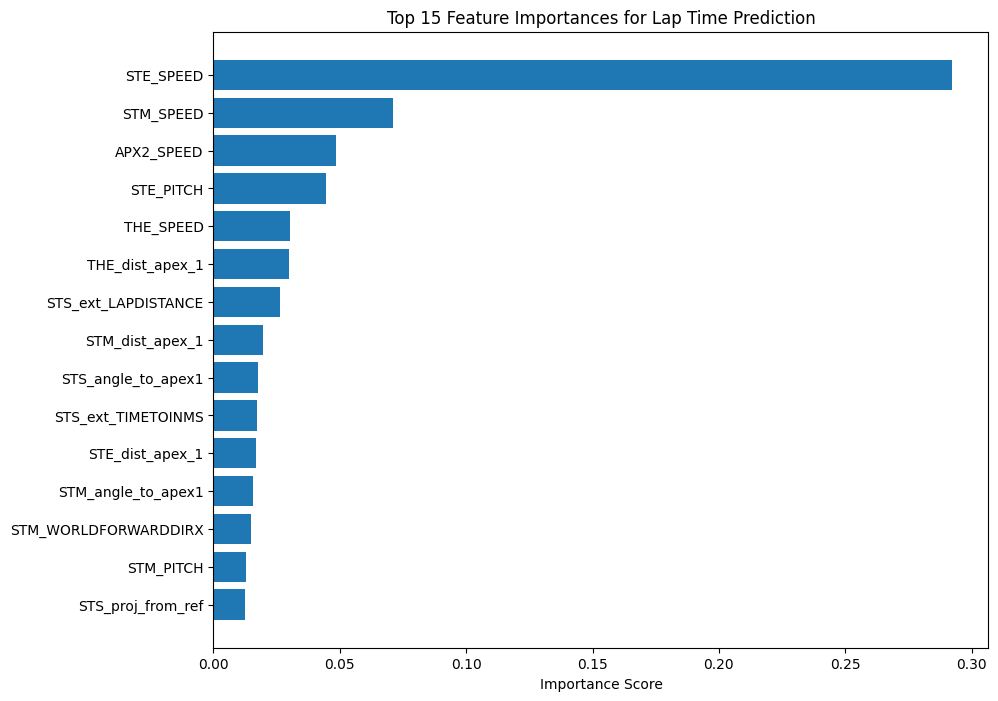

In [8]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Drop identifiers / non-numeric
# df = df.drop(columns=["DROPPED"], errors="ignore") # This line is redundant and refers to a non-existent column

target = "Target_CURRENTLAPTIMEINMS"

# Drop 'lap_id' and 'invalid_lap' as they are not numeric and not suitable for the model
X = df.drop(columns=["lap_id", "invalid_lap", target], errors="ignore")
y = df[target]

# Handles missing values
X = X.fillna(X.mean(numeric_only=True))
y = y.fillna(y.mean())

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define and train XGBoost model
model = XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="reg:squarederror"
)

model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f} ms")

# Feature importance plot
plt.figure(figsize=(10, 8))
importance = model.feature_importances_
sorted_idx = np.argsort(importance)[-15:]  # top 15 features
plt.barh(X.columns[sorted_idx], importance[sorted_idx])
plt.title("Top 15 Feature Importances for Lap Time Prediction")
plt.xlabel("Importance Score")
plt.show()